G8 ülkeleri ve Türkiye Enerji Tüketimleri Enerjide Kullanılan Maddelerin Payları İncelenmiştir
Grup Üyeleri:
    Yasin Top - 20184029009


In [1]:
import pandas              as pd
import seaborn             as sns
import numpy               as np
import matplotlib.pyplot   as plt
from sklearn                        import tree
from sklearn                        import metrics
from sklearn.tree                   import DecisionTreeClassifier 
from sklearn.model_selection        import train_test_split
from sklearn.preprocessing          import StandardScaler
from sklearn.metrics                import confusion_matrix
from sklearn                        import utils
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn.model_selection        import cross_val_score
from sklearn.cluster                import KMeans
from sklearn.metrics                import r2_score, mean_absolute_error, mean_squared_error



In [2]:
dataset=pd.read_excel("G8_and_Turkey_Dataset1234.xlsx")


In [3]:
dataset5=dataset[["population","coal_share_energy","coal_consumption","renewables_share_energy","renewables_consumption"]]


In [4]:
dataf=pd.DataFrame(dataset)

print(dataf)

   iso_code         country  year  population            gdp  \
0       TUR          Turkey  2009    71321000  1130000000000   
1       TUR          Turkey  2010    72327000  1250000000000   
2       TUR          Turkey  2011    73443000  1400000000000   
3       TUR          Turkey  2012    74651000  1490000000000   
4       TUR          Turkey  2013    75925000  1560000000000   
..      ...             ...   ...         ...            ...   
67      GBR  United Kingdom  2012    64525000  2290000000000   
68      GBR  United Kingdom  2013    64984000  2430000000000   
69      GBR  United Kingdom  2014    65423000  2480000000000   
70      GBR  United Kingdom  2015    65860000  2530000000000   
71      GBR  United Kingdom  2016    66298000  2580000000000   

    coal_share_energy  coal_consumption  hydro_electricity  \
0              30.254           359.344             35.598   
1              29.241           365.624             51.423   
2              29.488           394.011      

In [5]:
dataset.head(10)

,iso_code,country,year,population,gdp,coal_share_energy,coal_consumption,hydro_electricity,nuclear_electricity,renewables_electricity,...,nuclear_share_energy,oil_share_energy,renewables_share_elec,renewables_share_energy,renewables_consumption,solar_share_elec,solar_share_energy,solar_consumption,wind_share_elec,wind_share_energy
0,TUR,Turkey,2009,71321000,1130000000000,30.254,359.344,35.598,0.000,37.944,...,0.000,32.924,20.496,8.424,100.062,0.000,0.000,0.000,0.808,0.330
1,TUR,Turkey,2010,72327000,1250000000000,29.241,365.624,51.423,0.000,55.353,...,0.000,30.487,27.484,11.618,145.270,0.000,0.001,0.006,1.444,0.608
2,TUR,Turkey,2011,73443000,1400000000000,29.488,394.011,51.155,0.000,56.927,...,0.000,27.917,26.134,11.269,150.571,0.000,0.001,0.007,2.165,0.916
3,TUR,Turkey,2012,74651000,1490000000000,29.924,424.437,56.669,0.000,63.993,...,0.000,27.632,28.105,11.844,167.994,0.000,0.001,0.011,2.564,1.064
4,TUR,Turkey,2013,75925000,1560000000000,26.082,367.092,58.225,0.000,68.087,...,0.000,29.777,29.799,12.593,177.238,0.000,0.001,0.017,3.298,1.375
5,TUR,Turkey,2014,77229000,1650000000000,28.910,420.146,39.750,0.000,51.707,...,0.000,29.664,21.657,9.216,133.935,0.007,0.003,0.044,3.554,1.492
6,TUR,Turkey,2015,78529000,1720000000000,25.414,404.026,65.856,0.000,82.293,...,0.000,32.289,33.017,13.312,211.635,0.077,0.031,0.491,4.650,1.854
7,TUR,Turkey,2016,79828000,1570000000000,26.788,447.261,66.686,0.000,89.430,...,0.000,32.893,34.153,13.592,226.946,0.387,0.157,2.623,5.874,2.337
8,USA,United States,2009,306308000,14900000000000,21.948,5482.381,268.818,798.855,413.096,...,8.832,38.980,10.457,5.515,1377.491,0.023,0.022,5.446,1.870,0.784
9,USA,United States,2010,309011008,15300000000000,22.460,5800.546,254.702,806.968,421.875,...,8.576,38.303,10.227,5.562,1436.544,0.029,0.030,7.856,2.295,0.965


In [6]:
dataset.tail(10)

,iso_code,country,year,population,gdp,coal_share_energy,coal_consumption,hydro_electricity,nuclear_electricity,renewables_electricity,...,nuclear_share_energy,oil_share_energy,renewables_share_elec,renewables_share_energy,renewables_consumption,solar_share_elec,solar_share_energy,solar_consumption,wind_share_elec,wind_share_energy
62,RUS,Russia,2015,144984992,3330000000000,13.706,1071.356,166.313,182.807,170.077,...,6.326,22.218,16.850,5.468,427.425,0.033,0.011,0.849,0.015,0.005
63,RUS,Russia,2016,145275008,3320000000000,12.993,1037.978,182.766,184.054,186.290,...,6.189,22.318,18.046,5.845,466.932,0.045,0.015,1.178,0.015,0.005
64,GBR,United Kingdom,2009,62829000,2230000000000,14.300,346.488,5.228,69.098,25.245,...,7.481,37.361,6.767,3.210,77.786,0.005,0.002,0.052,2.488,1.005
65,GBR,United Kingdom,2010,63460000,2210000000000,14.487,359.691,3.591,62.140,26.181,...,6.526,36.024,6.909,3.294,81.786,0.011,0.004,0.105,2.714,1.080
66,GBR,United Kingdom,2011,64022000,2220000000000,15.582,365.752,5.691,68.980,35.213,...,7.616,37.479,9.645,4.422,103.794,0.067,0.027,0.631,4.372,1.762
67,GBR,United Kingdom,2012,64525000,2290000000000,19.069,453.082,5.310,70.405,41.249,...,7.632,36.015,11.429,4.919,116.866,0.375,0.147,3.487,5.499,2.152
68,GBR,United Kingdom,2013,64984000,2430000000000,18.186,429.998,4.701,70.607,53.214,...,7.645,35.613,14.974,6.275,148.359,0.566,0.218,5.147,7.990,3.075
69,GBR,United Kingdom,2014,65423000,2480000000000,15.532,346.043,5.888,63.748,64.523,...,7.282,37.752,19.248,7.990,178.008,1.209,0.463,10.317,9.534,3.651
70,GBR,United Kingdom,2015,65860000,2530000000000,11.911,268.353,6.297,70.345,82.576,...,7.899,38.359,24.624,9.853,221.972,2.246,0.846,19.056,12.010,4.522
71,GBR,United Kingdom,2016,66298000,2580000000000,5.790,128.894,5.394,71.726,81.608,...,8.103,39.960,24.374,9.907,220.545,3.109,1.176,26.174,11.097,4.197


In [7]:
dataset.shape

(72, 24)

In [8]:
dataset.dtypes

iso_code                    object
country                     object
year                         int64
population                   int64
gdp                          int64
coal_share_energy          float64
coal_consumption           float64
hydro_electricity          float64
nuclear_electricity        float64
renewables_electricity     float64
solar_electricity          float64
wind_electricity           float64
hydro_share_elec           float64
hydro_share_energy         float64
nuclear_share_energy       float64
oil_share_energy           float64
renewables_share_elec      float64
renewables_share_energy    float64
renewables_consumption     float64
solar_share_elec           float64
solar_share_energy         float64
solar_consumption          float64
wind_share_elec            float64
wind_share_energy          float64
dtype: object

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 72 non-null     object 
 1   country                  72 non-null     object 
 2   year                     72 non-null     int64  
 3   population               72 non-null     int64  
 4   gdp                      72 non-null     int64  
 5   coal_share_energy        72 non-null     float64
 6   coal_consumption         72 non-null     float64
 7   hydro_electricity        72 non-null     float64
 8   nuclear_electricity      72 non-null     float64
 9   renewables_electricity   72 non-null     float64
 10  solar_electricity        72 non-null     float64
 11  wind_electricity         72 non-null     float64
 12  hydro_share_elec         72 non-null     float64
 13  hydro_share_energy       72 non-null     float64
 14  nuclear_share_energy     72 

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,72.0,2.012500e+03,2.307367e+00,2.009000e+03,2.010750e+03,2.012500e+03,2.014250e+03,2.016000e+03
population,72.0,1.075083e+08,8.073491e+07,3.374600e+07,6.286725e+07,7.528800e+07,1.285098e+08,3.230160e+08
gdp,72.0,4.132917e+12,4.351477e+12,1.130000e+12,2.075000e+12,2.530000e+12,3.797500e+12,1.720000e+13
coal_share_energy,72.0,1.597554e+01,8.459788e+00,3.499000e+00,7.824500e+00,1.499150e+01,2.377325e+01,3.025400e+01
coal_consumption,72.0,1.062978e+03,1.471840e+03,9.487800e+01,2.255288e+02,4.222915e+02,1.077167e+03,5.800546e+03
hydro_electricity,72.0,1.198245e+02,1.195611e+02,3.591000e+00,4.134375e+01,6.324350e+01,1.749703e+02,3.878710e+02
nuclear_electricity,72.0,1.941532e+02,2.484566e+02,0.000000e+00,8.036000e+00,9.564350e+01,2.038038e+02,8.069680e+02
renewables_electricity,72.0,1.869383e+02,1.546889e+02,2.524500e+01,8.212175e+01,1.323370e+02,1.882210e+02,6.215710e+02
solar_electricity,72.0,9.434222e+00,1.328585e+01,0.000000e+00,2.507500e-01,2.812000e+00,1.199475e+01,5.486600e+01
wind_electricity,72.0,3.189336e+01,4.813193e+01,4.000000e-03,5.772750e+00,1.412550e+01,3.325800e+01,2.269930e+02


 DataFrame'in sayısal değerlerinin yüzdelik, ortalama ve std (kartilleri) gibi bazi istatistiksel verileri hesaplamak için kullanılır. Ülke gibi kategorik değerleri işleme almaz.

In [11]:
dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     iso_code  country   year  population    gdp  coal_share_energy  \
0      False    False  False       False  False              False   
1      False    False  False       False  False              False   
2      False    False  False       False  False              False   
3      False    False  False       False  False              False   
4      False    False  False       False  False              False   
..       ...      ...    ...         ...    ...                ...   
67     False    False  False       False  False              False   
68     False    False  False       False  False              False   
69     False    False  False       False  False              False   
70     False    False  False       False  False              False   
71     False    False  False       False  False              False   

    coal_consumption  hydro_electricity  nuclear_electricity  \
0              False             

In [12]:
dataset.dropna(axis="index",how="any")

,iso_code,country,year,population,gdp,coal_share_energy,coal_consumption,hydro_electricity,nuclear_electricity,renewables_electricity,...,nuclear_share_energy,oil_share_energy,renewables_share_elec,renewables_share_energy,renewables_consumption,solar_share_elec,solar_share_energy,solar_consumption,wind_share_elec,wind_share_energy
0,TUR,Turkey,2009,71321000,1130000000000,30.254,359.344,35.598,0.000,37.944,...,0.000,32.924,20.496,8.424,100.062,0.000,0.000,0.000,0.808,0.330
1,TUR,Turkey,2010,72327000,1250000000000,29.241,365.624,51.423,0.000,55.353,...,0.000,30.487,27.484,11.618,145.270,0.000,0.001,0.006,1.444,0.608
2,TUR,Turkey,2011,73443000,1400000000000,29.488,394.011,51.155,0.000,56.927,...,0.000,27.917,26.134,11.269,150.571,0.000,0.001,0.007,2.165,0.916
3,TUR,Turkey,2012,74651000,1490000000000,29.924,424.437,56.669,0.000,63.993,...,0.000,27.632,28.105,11.844,167.994,0.000,0.001,0.011,2.564,1.064
4,TUR,Turkey,2013,75925000,1560000000000,26.082,367.092,58.225,0.000,68.087,...,0.000,29.777,29.799,12.593,177.238,0.000,0.001,0.017,3.298,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,GBR,United Kingdom,2012,64525000,2290000000000,19.069,453.082,5.310,70.405,41.249,...,7.632,36.015,11.429,4.919,116.866,0.375,0.147,3.487,5.499,2.152
68,GBR,United Kingdom,2013,64984000,2430000000000,18.186,429.998,4.701,70.607,53.214,...,7.645,35.613,14.974,6.275,148.359,0.566,0.218,5.147,7.990,3.075
69,GBR,United Kingdom,2014,65423000,2480000000000,15.532,346.043,5.888,63.748,64.523,...,7.282,37.752,19.248,7.990,178.008,1.209,0.463,10.317,9.534,3.651
70,GBR,United Kingdom,2015,65860000,2530000000000,11.911,268.353,6.297,70.345,82.576,...,7.899,38.359,24.624,9.853,221.972,2.246,0.846,19.056,12.010,4.522


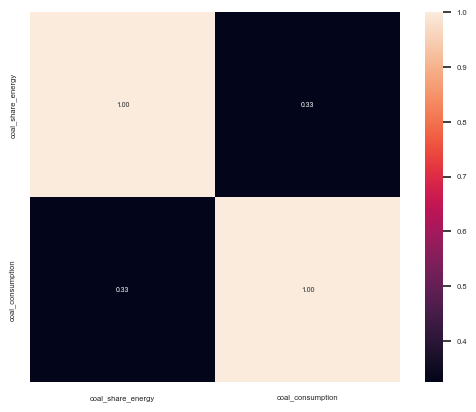

In [13]:
cols=['coal_share_energy','coal_consumption']
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=0.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':5},
                yticklabels=cols,
                xticklabels=cols)


In [14]:
dataset.groupby("year")["coal_share_energy"].mean()

year
2009    16.068333
2010    16.297222
2011    16.420000
2012    16.989778
2013    16.402000
2014    16.246444
2015    15.182667
2016    14.197889
Name: coal_share_energy, dtype: float64

In [15]:
turkiye = dataset[dataset["country"] == "Turkey"]

In [16]:
print(turkiye)

  iso_code country  year  population            gdp  coal_share_energy  \
0      TUR  Turkey  2009    71321000  1130000000000             30.254   
1      TUR  Turkey  2010    72327000  1250000000000             29.241   
2      TUR  Turkey  2011    73443000  1400000000000             29.488   
3      TUR  Turkey  2012    74651000  1490000000000             29.924   
4      TUR  Turkey  2013    75925000  1560000000000             26.082   
5      TUR  Turkey  2014    77229000  1650000000000             28.910   
6      TUR  Turkey  2015    78529000  1720000000000             25.414   
7      TUR  Turkey  2016    79828000  1570000000000             26.788   

   coal_consumption  hydro_electricity  nuclear_electricity  \
0           359.344             35.598                  0.0   
1           365.624             51.423                  0.0   
2           394.011             51.155                  0.0   
3           424.437             56.669                  0.0   
4           367.09

In [17]:
turkiye.groupby("year")["coal_share_energy"].mean()

year
2009    30.254
2010    29.241
2011    29.488
2012    29.924
2013    26.082
2014    28.910
2015    25.414
2016    26.788
Name: coal_share_energy, dtype: float64

In [18]:
yillaragoretuketim=turkiye.groupby("year")["coal_consumption"].mean()

In [19]:
turkiye.groupby("year")[["wind_share_elec","hydro_share_elec","solar_share_elec"]].mean()

,wind_share_elec,hydro_share_elec,solar_share_elec
year,,,
2009,0.808,19.228,0.000
2010,1.444,25.533,0.000
2011,2.165,23.484,0.000
2012,2.564,24.888,0.000
2013,3.298,25.483,0.000
2014,3.554,16.649,0.007
2015,4.650,26.422,0.077
2016,5.874,25.467,0.387


In [20]:
dataset.groupby("year")[["wind_share_elec","hydro_share_elec","solar_share_elec"]].mean()

,wind_share_elec,hydro_share_elec,solar_share_elec
year,,,
2009,1.899556,16.174556,0.189444
2010,2.141222,16.439556,0.335444
2011,2.801444,15.944000,0.875444
2012,3.256333,16.214778,1.404667
2013,3.891556,17.089667,1.730000
2014,4.386667,16.112222,2.166111
2015,5.292667,16.383667,2.532111
2016,5.586889,16.337222,2.805778


In [21]:
almanya = dataset[dataset["country"] == "Germany"]

In [22]:
almanya.groupby("year")[["population","wind_share_elec","hydro_share_elec","solar_share_elec"]].mean()

,population,wind_share_elec,hydro_share_elec,solar_share_elec
year,,,,
2009,80900000.0,6.691,3.215,1.117
2010,80827000.0,6.158,3.350,1.867
2011,80856000.0,8.214,2.914,3.226
2012,80973000.0,8.281,3.499,4.237
2013,81174000.0,8.327,3.634,4.898
2014,81450000.0,9.405,3.151,5.804
2015,81787000.0,12.547,2.958,6.024
2016,82194000.0,12.407,3.179,5.909


In [23]:
almanya.groupby("year")[["population","renewables_share_energy"]].mean()

,population,renewables_share_energy
year,,
2009,80900000.0,7.705
2010,80827000.0,8.044
2011,80856000.0,9.675
2012,80973000.0,10.901
2013,81174000.0,11.048
2014,81450000.0,12.221
2015,81787000.0,13.671
2016,82194000.0,13.436


In [24]:
dataset.groupby("year")["coal_consumption"].mean()

year
2009    1091.519333
2010    1156.561889
2011    1118.893333
2012    1078.663444
2013    1086.433000
2014    1065.400667
2015     984.178222
2016     922.175222
Name: coal_consumption, dtype: float64

In [25]:
dataset2=dataset.groupby("country")[["gdp","coal_share_energy","coal_consumption","renewables_share_energy","renewables_consumption"]].mean()

print(dataset2)

                         gdp  coal_share_energy  coal_consumption  \
country                                                             
Canada          1.467500e+12           6.594375        247.830750   
France          2.450000e+12           4.099375        116.066125   
Germany         3.606250e+12          24.383375        908.952625   
Italy           2.087500e+12           8.302875        155.729250   
Japan           4.491250e+12          24.645875       1345.628375   
Russia          3.213750e+12          13.552875       1067.894375   
Turkey          1.471250e+12          28.262625        397.742625   
United Kingdom  2.371250e+12          14.357125        337.287625   
United States   1.603750e+13          19.581375       4989.671500   

                renewables_share_energy  renewables_consumption  
country                                                          
Canada                        27.930125             1053.679875  
France                         8.705625   

Dataset2 değişkeninde ülkelerin istenilen özelliklerinin ortalamaları alındı. Sonrasında da sütunlar Türkçeleştirildi.

In [26]:

dataset2.rename(columns ={'gdp':'yurtiçi_milli_hasıla','coal_share_energy':'kömürün_enerji_payı','coal_consumption':'kömür_tüketimi','renewables_share_energy':'yenilenebilirin_enerjideki_oranı','renewables_consumption':'yenilenebilir_enerji_tüketimi'})


,yurtiçi_milli_hasıla,kömürün_enerji_payı,kömür_tüketimi,yenilenebilirin_enerjideki_oranı,yenilenebilir_enerji_tüketimi
country,,,,,
Canada,1.467500e+12,6.594375,247.830750,27.930125,1053.679875
France,2.450000e+12,4.099375,116.066125,8.705625,245.223750
Germany,3.606250e+12,24.383375,908.952625,10.837625,404.173375
Italy,2.087500e+12,8.302875,155.729250,14.067875,261.004375
Japan,4.491250e+12,24.645875,1345.628375,5.830250,317.595500
Russia,3.213750e+12,13.552875,1067.894375,5.622375,442.865125
Turkey,1.471250e+12,28.262625,397.742625,11.483500,164.206375
United Kingdom,2.371250e+12,14.357125,337.287625,6.233750,143.639500
United States,1.603750e+13,19.581375,4989.671500,6.581125,1677.809000


<AxesSubplot:>

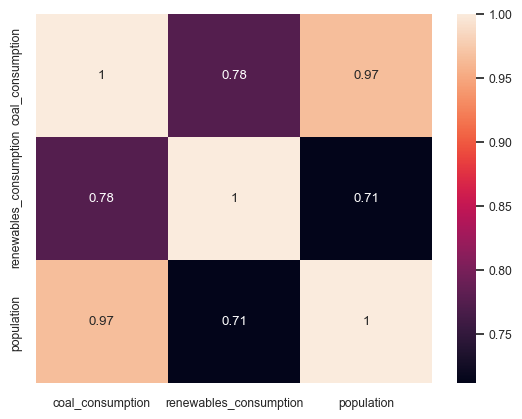

In [27]:
korelasyon=dataset[["coal_consumption","renewables_consumption","population"]]
sns.set(font_scale=0.8)
sns.heatmap(korelasyon.corr(),annot=True)


<AxesSubplot:>

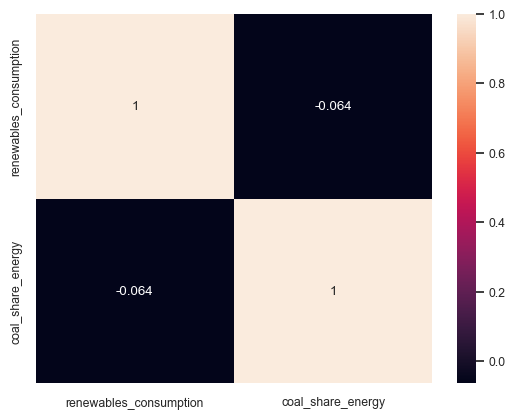

In [28]:
korelasyon=dataset[["renewables_consumption","coal_share_energy"]]
sns.set(font_scale=0.8)
sns.heatmap(korelasyon.corr(),annot=True)

Daha fazla ilişkiye sahip bir ısı haritası oluşturalım, tablomuzu tekrar getirtip karşılaştıralım.

In [29]:
dataset

,iso_code,country,year,population,gdp,coal_share_energy,coal_consumption,hydro_electricity,nuclear_electricity,renewables_electricity,...,nuclear_share_energy,oil_share_energy,renewables_share_elec,renewables_share_energy,renewables_consumption,solar_share_elec,solar_share_energy,solar_consumption,wind_share_elec,wind_share_energy
0,TUR,Turkey,2009,71321000,1130000000000,30.254,359.344,35.598,0.000,37.944,...,0.000,32.924,20.496,8.424,100.062,0.000,0.000,0.000,0.808,0.330
1,TUR,Turkey,2010,72327000,1250000000000,29.241,365.624,51.423,0.000,55.353,...,0.000,30.487,27.484,11.618,145.270,0.000,0.001,0.006,1.444,0.608
2,TUR,Turkey,2011,73443000,1400000000000,29.488,394.011,51.155,0.000,56.927,...,0.000,27.917,26.134,11.269,150.571,0.000,0.001,0.007,2.165,0.916
3,TUR,Turkey,2012,74651000,1490000000000,29.924,424.437,56.669,0.000,63.993,...,0.000,27.632,28.105,11.844,167.994,0.000,0.001,0.011,2.564,1.064
4,TUR,Turkey,2013,75925000,1560000000000,26.082,367.092,58.225,0.000,68.087,...,0.000,29.777,29.799,12.593,177.238,0.000,0.001,0.017,3.298,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,GBR,United Kingdom,2012,64525000,2290000000000,19.069,453.082,5.310,70.405,41.249,...,7.632,36.015,11.429,4.919,116.866,0.375,0.147,3.487,5.499,2.152
68,GBR,United Kingdom,2013,64984000,2430000000000,18.186,429.998,4.701,70.607,53.214,...,7.645,35.613,14.974,6.275,148.359,0.566,0.218,5.147,7.990,3.075
69,GBR,United Kingdom,2014,65423000,2480000000000,15.532,346.043,5.888,63.748,64.523,...,7.282,37.752,19.248,7.990,178.008,1.209,0.463,10.317,9.534,3.651
70,GBR,United Kingdom,2015,65860000,2530000000000,11.911,268.353,6.297,70.345,82.576,...,7.899,38.359,24.624,9.853,221.972,2.246,0.846,19.056,12.010,4.522


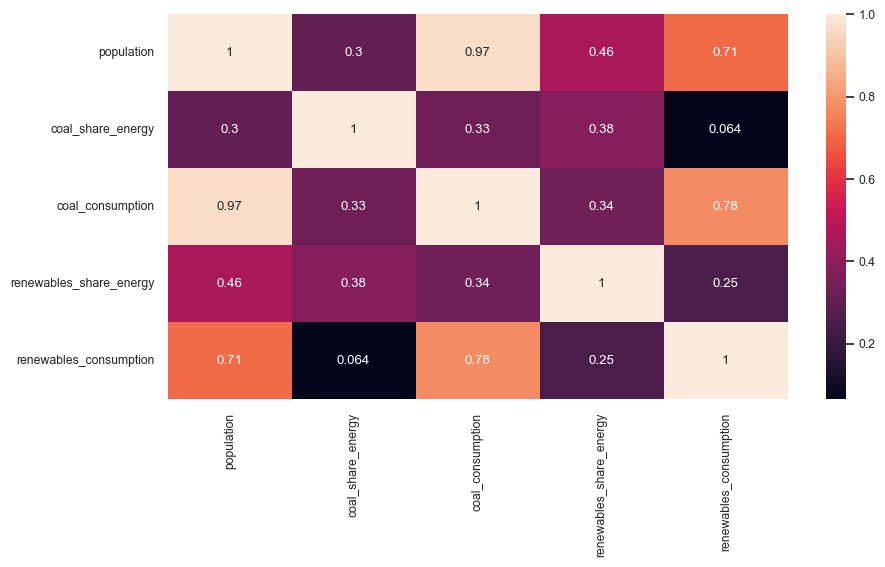

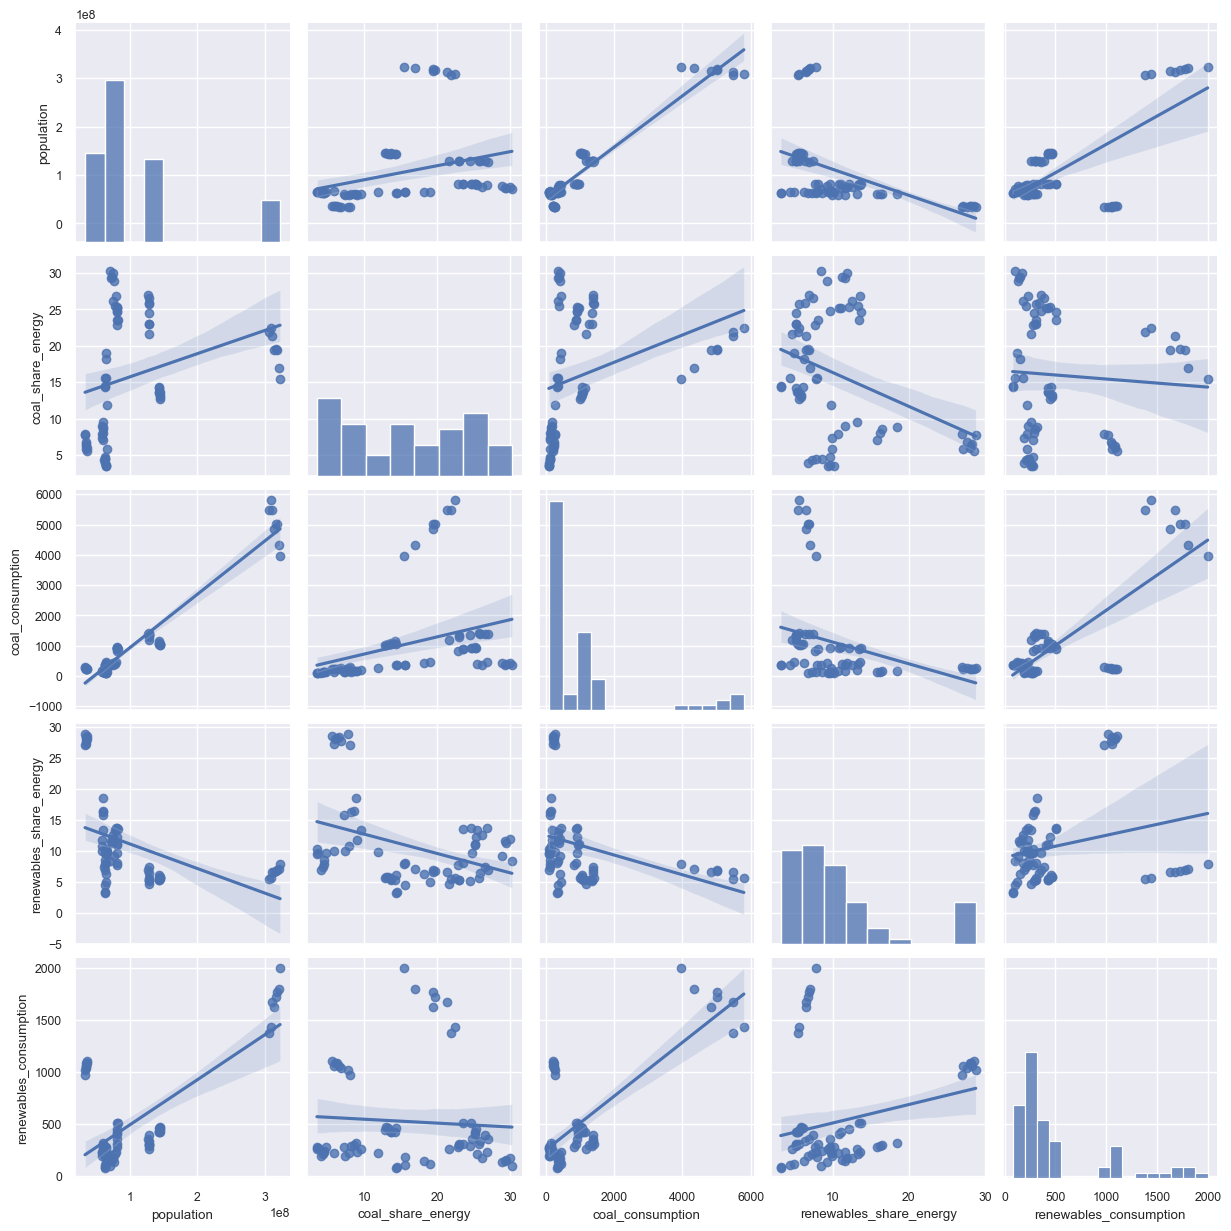

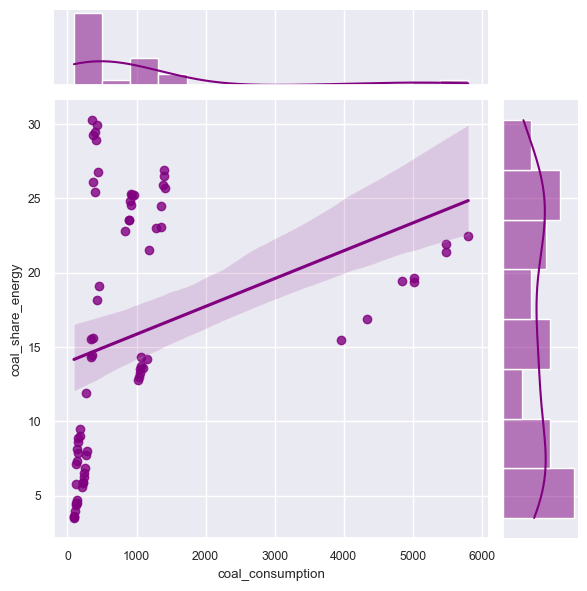

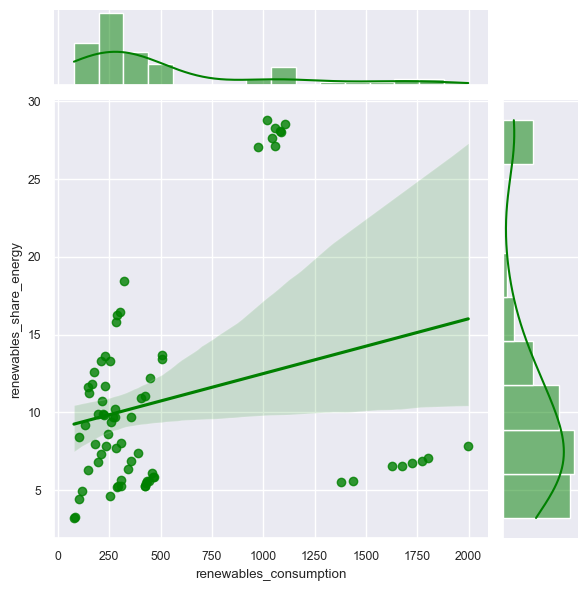

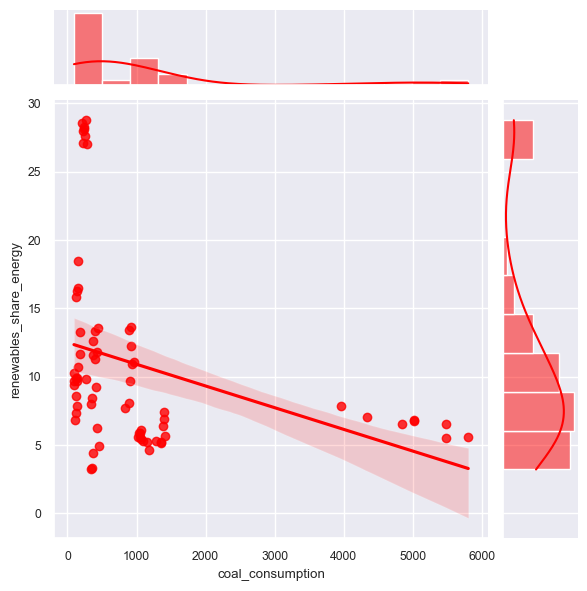

In [30]:
plt.figure(figsize=(10, 5))
sns.heatmap(dataset5.corr().abs(),  annot=True)
sns.pairplot(dataset5, kind="reg")

sns.jointplot(x="coal_consumption",y="coal_share_energy",data=dataset5, kind="reg", color="purple")

sns.jointplot(x="renewables_consumption",y="renewables_share_energy",data=dataset5, kind="reg", color="green")

sns.jointplot(x="coal_consumption",y="renewables_share_energy",data=dataset5, kind="reg", color="red")


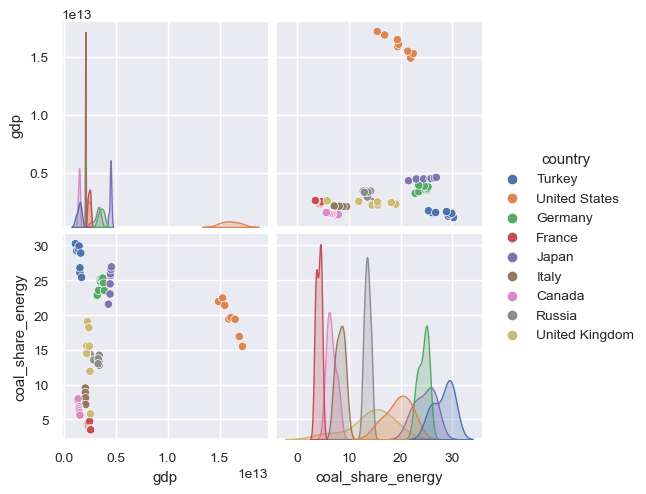

In [31]:
datasetpair2=dataset[["country","gdp","coal_share_energy"]]
sns.set(font_scale=0.9)
sns.pairplot(datasetpair2,hue="country",diag_kind="kde")
plt.show()

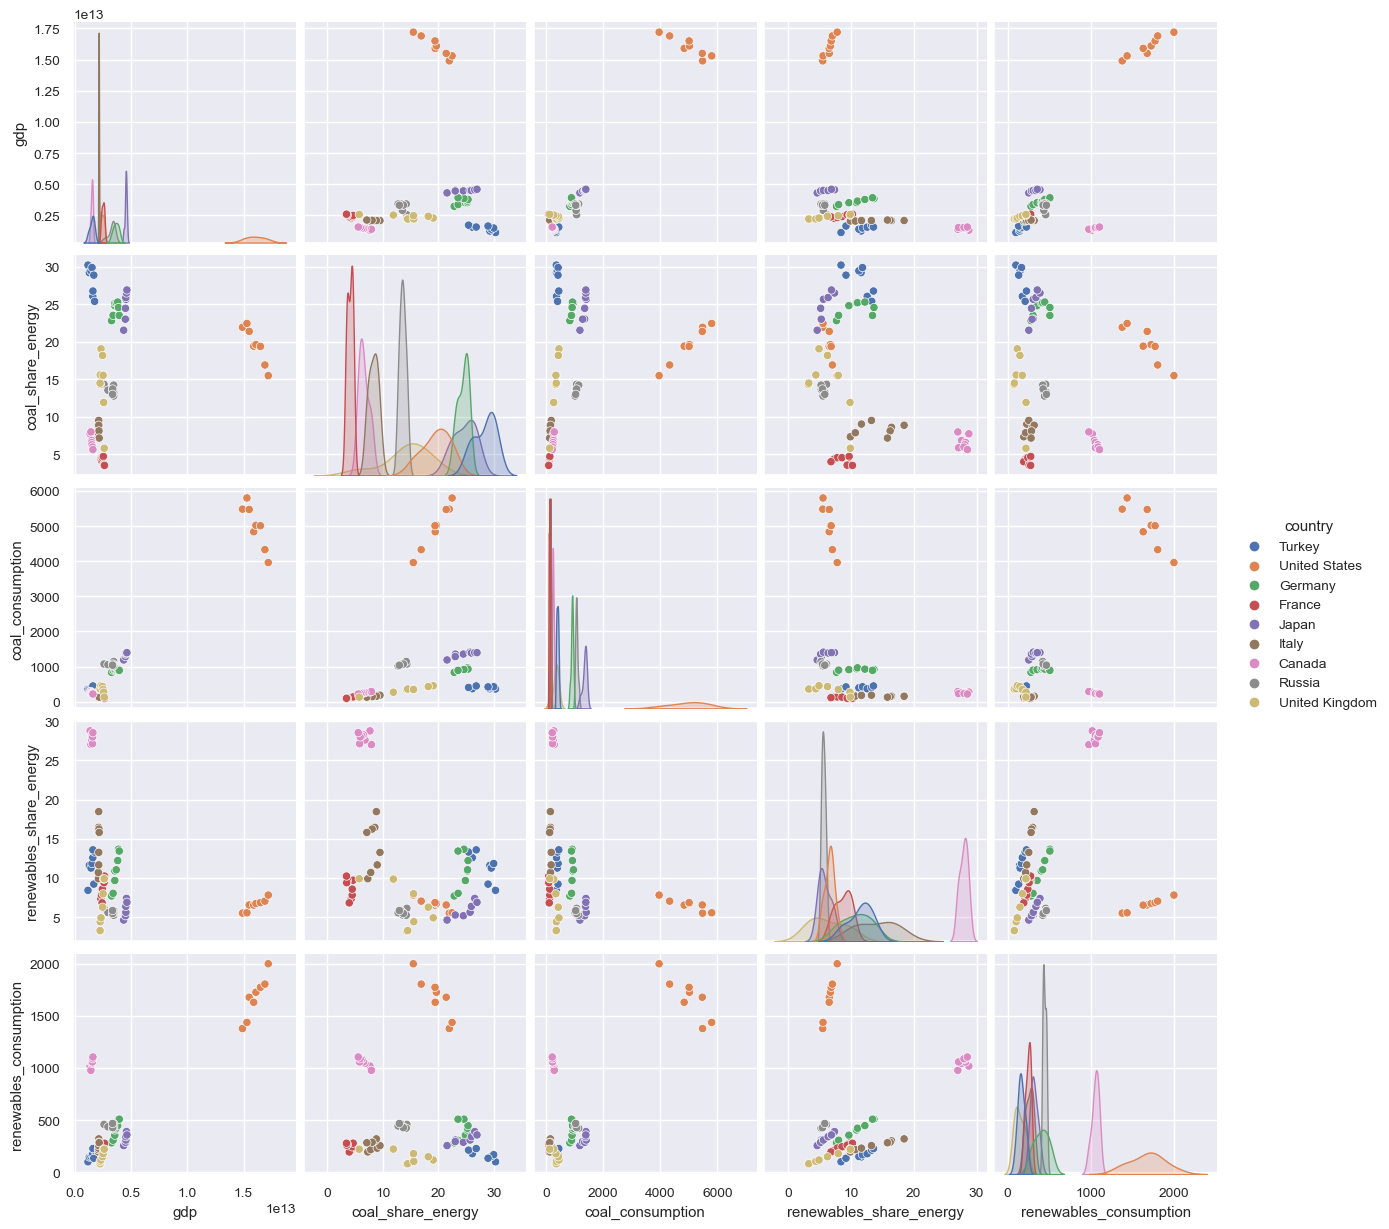

In [32]:
datasetpair2=dataset[["country","gdp","coal_share_energy","coal_consumption","renewables_share_energy","renewables_consumption"]]
sns.set(font_scale=0.9)
sns.pairplot(datasetpair2,hue="country",diag_kind="kde")
plt.show()

<AxesSubplot:>

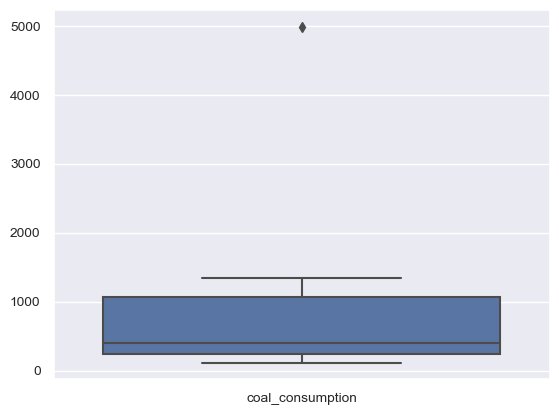

In [33]:
sns.boxplot(data=dataset2[["coal_consumption"]])

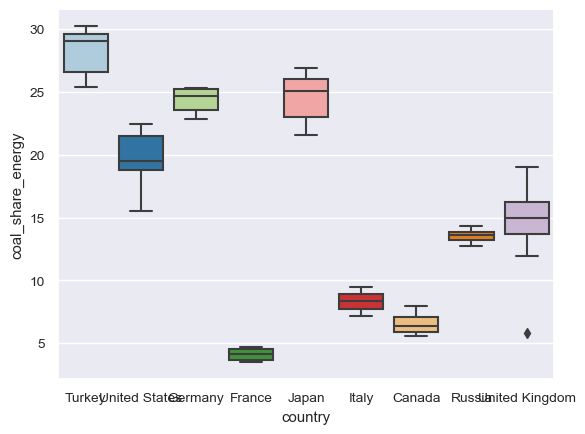

In [34]:
sns.boxplot(x=dataf["country"], y=dataf["coal_share_energy"], palette="Paired")
plt.show()

<AxesSubplot:>

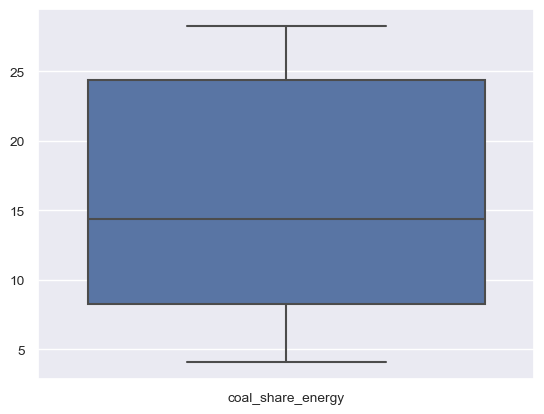

In [35]:
sns.boxplot(data=dataset2[["coal_share_energy"]])

distplot ile görselleştirelim

<AxesSubplot:>

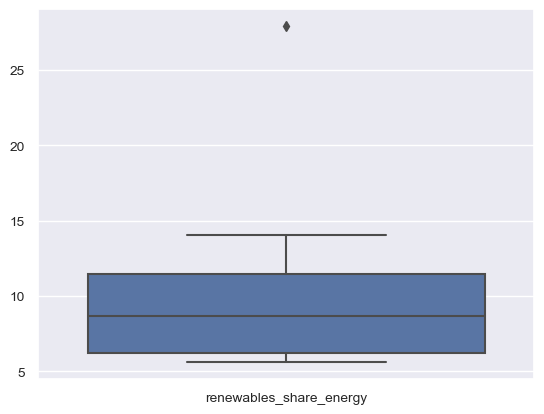

In [36]:
sns.boxplot(data=dataset2[["renewables_share_energy"]])

Bir ülkenin enerji üretiminde yenilenebilir enerjiyi diğer ülkelerden açık ara daha fazla kullandığını görüyoruz.

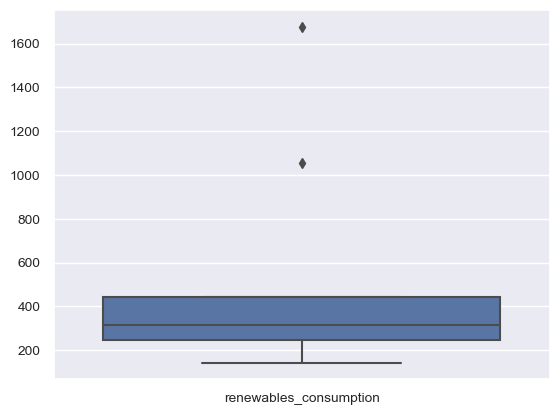

In [37]:
sns.boxplot(data=dataset2[["renewables_consumption"]])
sns.set(font_scale=0.8)

İki ülke yenilenebilir enerjiyi daha fazla kullanmıştır.

<AxesSubplot:>

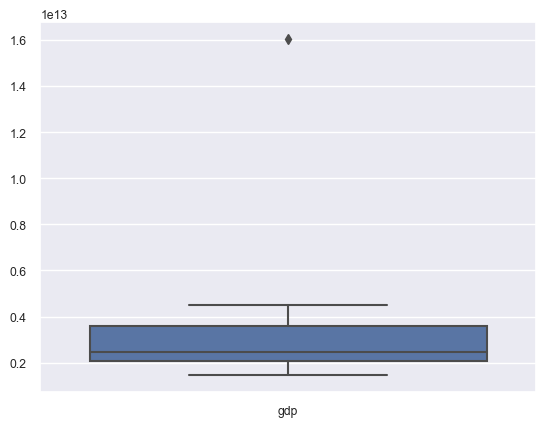

In [38]:
sns.boxplot(data=dataset2[["gdp"]])

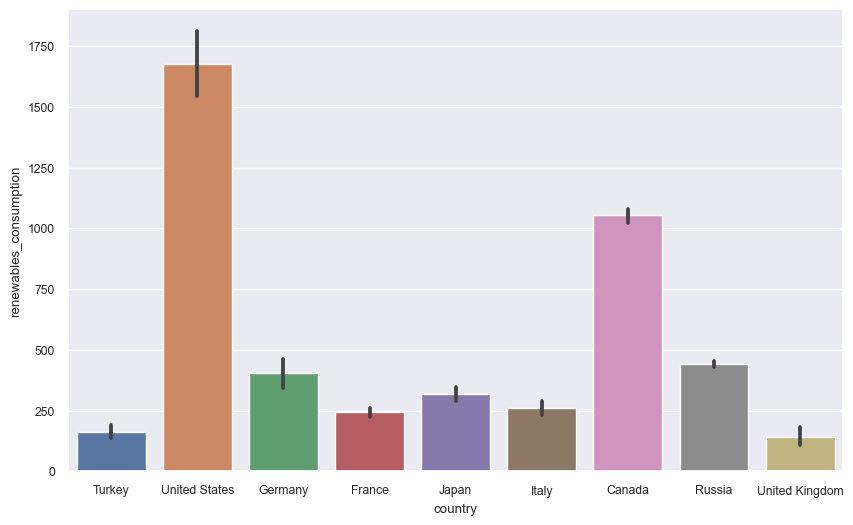

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x="country",y="renewables_consumption",data=dataset)
sns.set(font_scale=0.9)
plt.show()

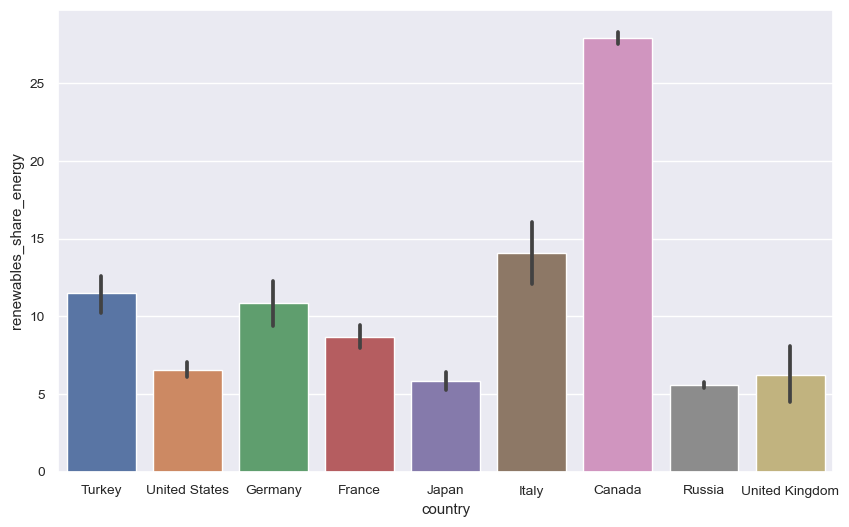

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x="country",y="renewables_share_energy",data=dataset)
sns.set(font_scale=0.9)
plt.show()

Miktar olarak yenilenebilir enerjiyi en fazla kullanan ülke Amerika, ama enerji üretiminde yenilenebilir enerjinin payı en yüksek ülke Kanada.
Bu karşılaştırmayı bir de saçılım grafiği ile gözlemleyelim:

Son üç saçılım grafiğinde : Yıllar geçtikçe kömür üretimi de yenilenebilir enerjiler de artmış ama kömürün payı azalmıştır çünkü ; enerji üretimi payında yenilenebilir enerji her sene daha fazla yer edinmiştir.

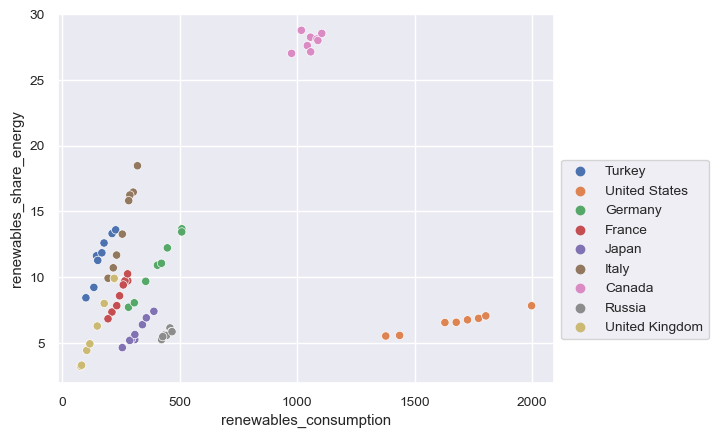

In [41]:
sns.scatterplot(x="renewables_consumption", y="renewables_share_energy",data= dataset,hue=dataset.country)
plt.legend(loc='lower left', bbox_to_anchor=(1,0.1))
sns.set(font_scale=1.3)
plt.show()

 barplot grafiği ile paralel bir görüntü var. 
 Yani yenilenebilir enerji tüketimi en fazla olan ülke Amerika ama yenilenebilir enerjiyi diğer enerjilerden daha üstün bir payda tutmamış.Hata diğer ülkelere göre bu enerjinin payları diğer ülkelerin yenilenebiir enerji payından daha az olmuş.
Kanada ise yenilenebilir enerjinin diğer enerjilere oranı özelliğini(diğer alternatif enerji kaynaklarına oranla bu enerji türünün payını) tüm ülkelerden daha fazla paya yerleştirmiştir, yani oldukça ön planda tutmuştur, ve tüketim olarak da neredeyse en çok yenilenebilir enerji tüketen ülke konumunda olmuştur.    

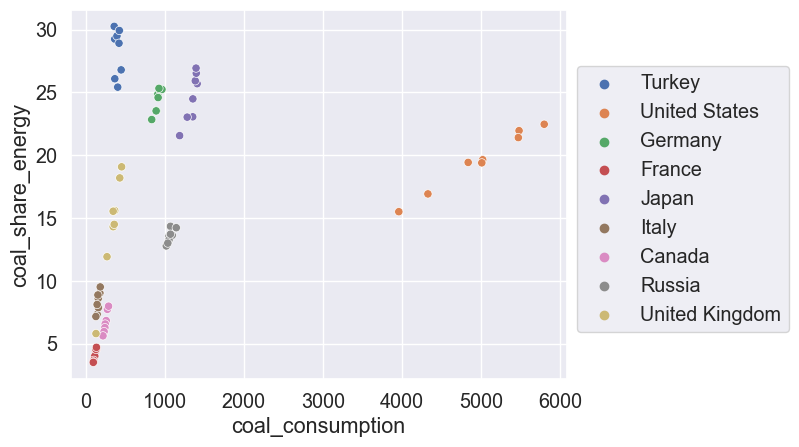

In [42]:
sns.scatterplot(x="coal_consumption", y="coal_share_energy",data= dataset,hue=dataset.country)
plt.legend(loc='lower left', bbox_to_anchor=(1,0.1))
sns.set(font_scale=1.3)
plt.show()

<h1> K-Means Modellemesi</h1>

Kümeleme modelimizi oluşturuyoruz. Öncelikle sadece verilerimizin bir kopyasını oluşturuyoruz ve onu x değişkeninde saklıyoruz.
Şimdi değişken k-means yaratacağız ve K-Means argümanı 2 olsun dedik.Yani 2 küme oluşturmak istediğimizi söyledik. Bu kod satırını k-means algoritmasını uygulayacak ve verilerimizi iki kümeye ayıracaktır.
Kümeleme argümanları :  'coal_share_energy' ve 'renewables_share_energy'

In [43]:
# dataset5 birkaç satır sonrasında tanımlanmıştır ve sütunları : population,coal_share_energy, coal_consumption, renewables_share_energy, renewables_consumption    
#Hızlıca ilişkileri tekrar göstermek istiyoruz.


In [44]:
x=dataset5.copy()
kmeans=KMeans(5)# 5  küme
kmeans.fit(x) #model


KMeans(n_clusters=5)

In [45]:
clusters=x.copy()
clusters['cluster_pred']=kmeans .fit_predict(x) # Bir önceki saturda modeLimizi olusturmustuk, bu satarda ise x datasina göre
#modelimizi tahminliyoruz.                                               


<function matplotlib.pyplot.show(close=None, block=None)>

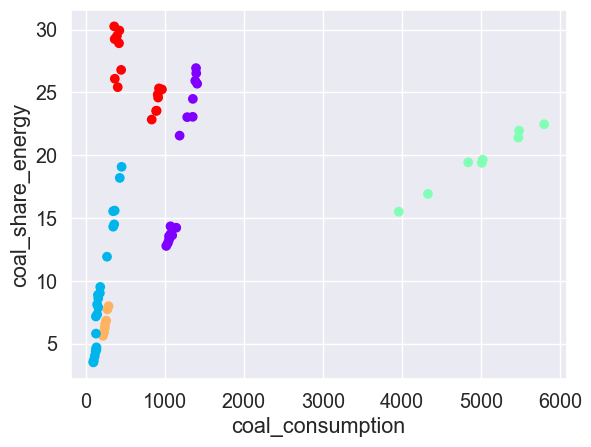

In [46]:
plt.scatter(clusters['coal_consumption'],clusters['coal_share_energy'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('coal_consumption')
plt.ylabel('coal_share_energy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

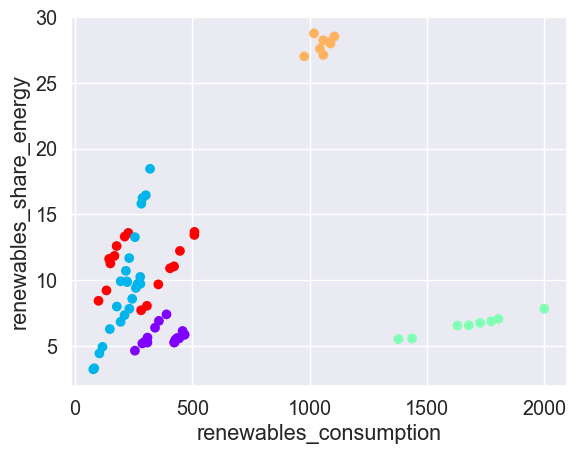

In [47]:
plt.scatter(clusters['renewables_consumption'],clusters['renewables_share_energy'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('renewables_consumption')
plt.ylabel('renewables_share_energy')
plt.show

In [48]:
# K-Means kümeleme modelimiz için bizim kullanacağımız argümanlar :  'coal_share_energy' ve 'renewables_share_energy'
# 
# Ve bu iki argümanı barındıracak olan veri setimizin ismini de 'datasetknn' yapıyoruz.

datasetk=dataset5[["coal_share_energy","renewables_share_energy"]]

In [49]:
#kmean kümeler arası uzaklığın yüksek, aynı kümedeki elemanlar arası yakın olması

Şimdi standartlaştırma yapmamız gerekiyor. Standartlaştırma , bizim daha sağlıklı ve doğru işlemler yapmamızı sağlar. Datamızda gördüğünüz üzere değerler birbirinden oldukça farklıdır. Bu bizim algoritmamızın bazı alt değerlerini görmezden gelmesine sebep olabilir,bu yüzden değerleri birbirine yakın seviyesine indirmemiz gerekiyor.

In [50]:
# İlişkiyi incelemek için artık sadece bahsettiğimiz iki argümanı kullanarak tekrar model yapacağız. İki küme olacak
# K-Means kümeleme modelimiz için bizim kullanacağımız argümanlar :  'coal_share_energy' ve 'renewables_share_energy'

# Aynı işlemlei tekrar yapıyoruz:



In [51]:
# 2,3,4 civarında küme olabilir 

In [52]:
x=datasetk.copy()
kmeans=KMeans(2) # 2  küme seçelim
kmeans.fit(x) #model

  

KMeans(n_clusters=2)

In [53]:
# İki küme kullanmamızın sebebi analizlerin zorlaşmasıdır ; hem veri karmaşasını engellemek hem de sadece gerekli argümanları karşılaştırmak için küme sayısını minimum tuttuk. 

In [54]:
clusters=x.copy()
clusters['cluster_pred']=kmeans .fit_predict(x) # Bir önceki saturda modeLimizi olusturmustuk, bu satarda ise x datasina göre
#modelimizi tahminliyoruz.

<function matplotlib.pyplot.show(close=None, block=None)>

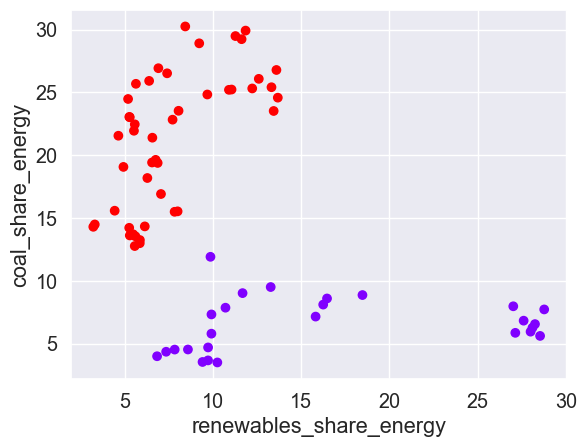

In [55]:
plt.scatter(clusters['renewables_share_energy'],clusters['coal_share_energy'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('renewables_share_energy')
plt.ylabel('coal_share_energy')
plt.show

Veriler sıfır ortalama civarında ölçeklenir. Şimdi her iki verinin de eşit şekilde ölçeklendiğini ve şimdi ikisinin de özellik olarak seçilme şansının eşit olacağını görebiliyoruz.

Dirsek Yöntemi

In [56]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[ 1.69964768, -0.34736288],
       [ 1.57906441,  0.11758297],
       [ 1.60846626,  0.06677956],
       [ 1.66036586,  0.15048146],
       [ 1.20303033,  0.25951228],
       [ 1.53966356, -0.23207261],
       [ 1.12351442,  0.36417604],
       [ 1.2870696 ,  0.40493523],
       [ 0.71093634, -0.7708217 ],
       [ 0.77188267, -0.76397998],
       [ 0.64522858, -0.61884817],
       [ 0.41013288, -0.6214684 ],
       [ 0.43524943, -0.59162685],
       [ 0.40596663, -0.57517761],
       [ 0.11147206, -0.54781073],
       [-0.05708262, -0.43528626],
       [ 0.81616399, -0.45202664],
       [ 0.90020326, -0.40267892],
       [ 1.05471172, -0.16525666],
       [ 1.09887401,  0.01321034],
       [ 1.10173087,  0.03460892],
       [ 1.11184891,  0.20536079],
       [ 1.0247147 ,  0.41643514],
       [ 0.89841772,  0.38222654],
       [-1.38373659, -0.50515915],
       [-1.36302436, -0.43470399],
       [-1.42623237, -0.57998137],
       [-1.36231015, -0.32523646],
       [-1.34278827,

In [57]:
wcss=[] # liste olusturduk.
# WCSS (Within Cluster Sum of Square) her bir noktanın küme merkezine olan uzaklığının karesinin toplamını alınarak hesaplanır.


In [58]:
#for i in range(1,72): #72 adet örnekLememimiz oldugu icin 1‘den 72'ye kadar gitmesini sağlıyoruz.
#kmeans=KMeans(i)
#kmeans.fit(x_scaled) #standortlaştırdığımız datamıza göre fit ettir, yani modelimizi olustur.
#wcss.append(kmeans.inertia_) #inertia ; Her bir k degeri icin wcss değerini (her bir noktanın küme merkezine uzaklığı) bul.
#wcss

In [59]:
wcss = []
kume_sayisi_listesi = range(1, 72)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\steam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


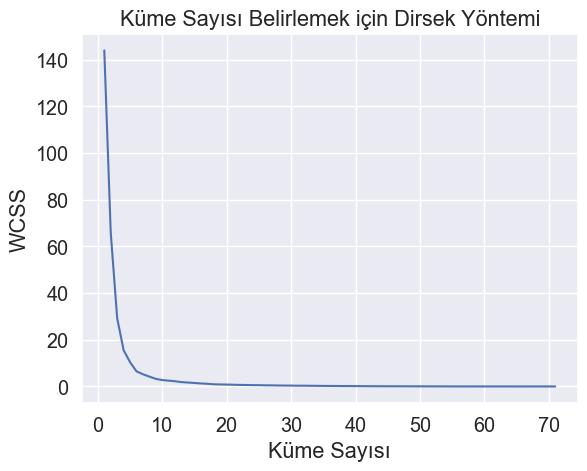

In [60]:
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Küme Sayısı Belirlemek için Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)


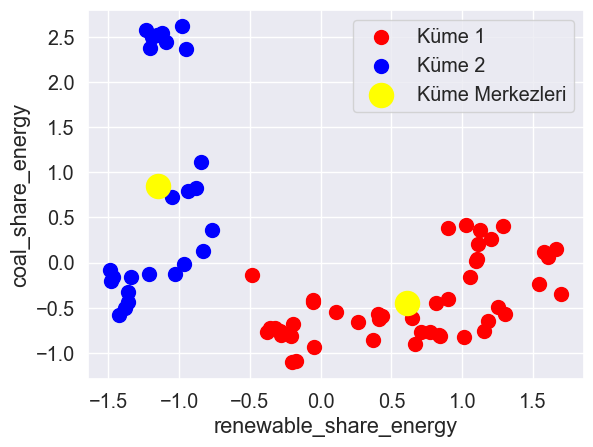

In [62]:
plt.scatter(x_scaled[y_kmeans == 0, 0],x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Küme 1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Küme 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Küme Merkezleri')
plt.title('')
plt.xlabel('renewable_share_energy')
plt.ylabel('coal_share_energy')
plt.legend()
plt.show()

In [63]:
kmeans.cluster_centers_.round(2)

array([[ 0.61, -0.45],
       [-1.15,  0.85]])

In [64]:
dataset.renewables_share_energy = (dataset.renewables_share_energy - dataset.renewables_share_energy.min() )/ (dataset.renewables_share_energy.max() - dataset.renewables_share_energy.min())
dataset.coal_consumption = (dataset.coal_consumption - dataset.coal_consumption.min() )/ (dataset.coal_consumption.max() - dataset.coal_consumption.min())



In [65]:
XX = dataset.renewables_share_energy
yy = dataset.coal_consumption




Text(0.5, 1.0, 'XX yy arasındaki ilişki')

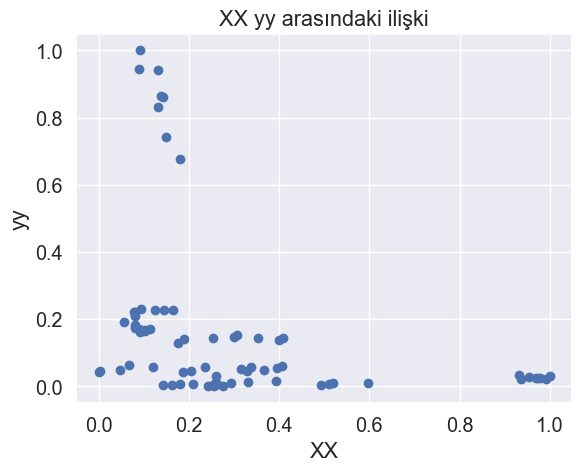

In [66]:
plt.scatter(XX.values,yy.values)
plt.xlabel('XX')
plt.ylabel('yy')
plt.title('XX yy arasındaki ilişki')



In [67]:
# Grafikte x ile y arasında doğrusal olmayan bir ilişki olduğu görülüyor. Şimdi en uygun çizgiyi çizdirmeye çalışalım.

In [68]:
lineer_regresyon = LinearRegression()
lineer_regresyon.fit(XX.values.reshape(-1,1),yy.values.reshape(-1,1))




LinearRegression()

In [69]:
# Modelimiz kuruldu ve verilerimize uyduruldu. Şimdi lineer modelimizi görüntüleyelim.

In [70]:
print(lineer_regresyon.intercept_)
print(lineer_regresyon.coef_)

    
   

[0.26548598]
[[-0.32227264]]


In [71]:
# Şimdi regresyonun performansına bakalım.

In [72]:
yy_predicted = lineer_regresyon.predict(XX.values.reshape(-1,1))
r2_score(yy,yy_predicted)

0.11429313072274194

In [73]:
altereddataset=dataset[["country","year","gdp","coal_share_energy","coal_consumption","renewables_share_energy","renewables_consumption","nuclear_share_energy"]]


In [74]:
mask=np.zeros_like(altereddataset.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

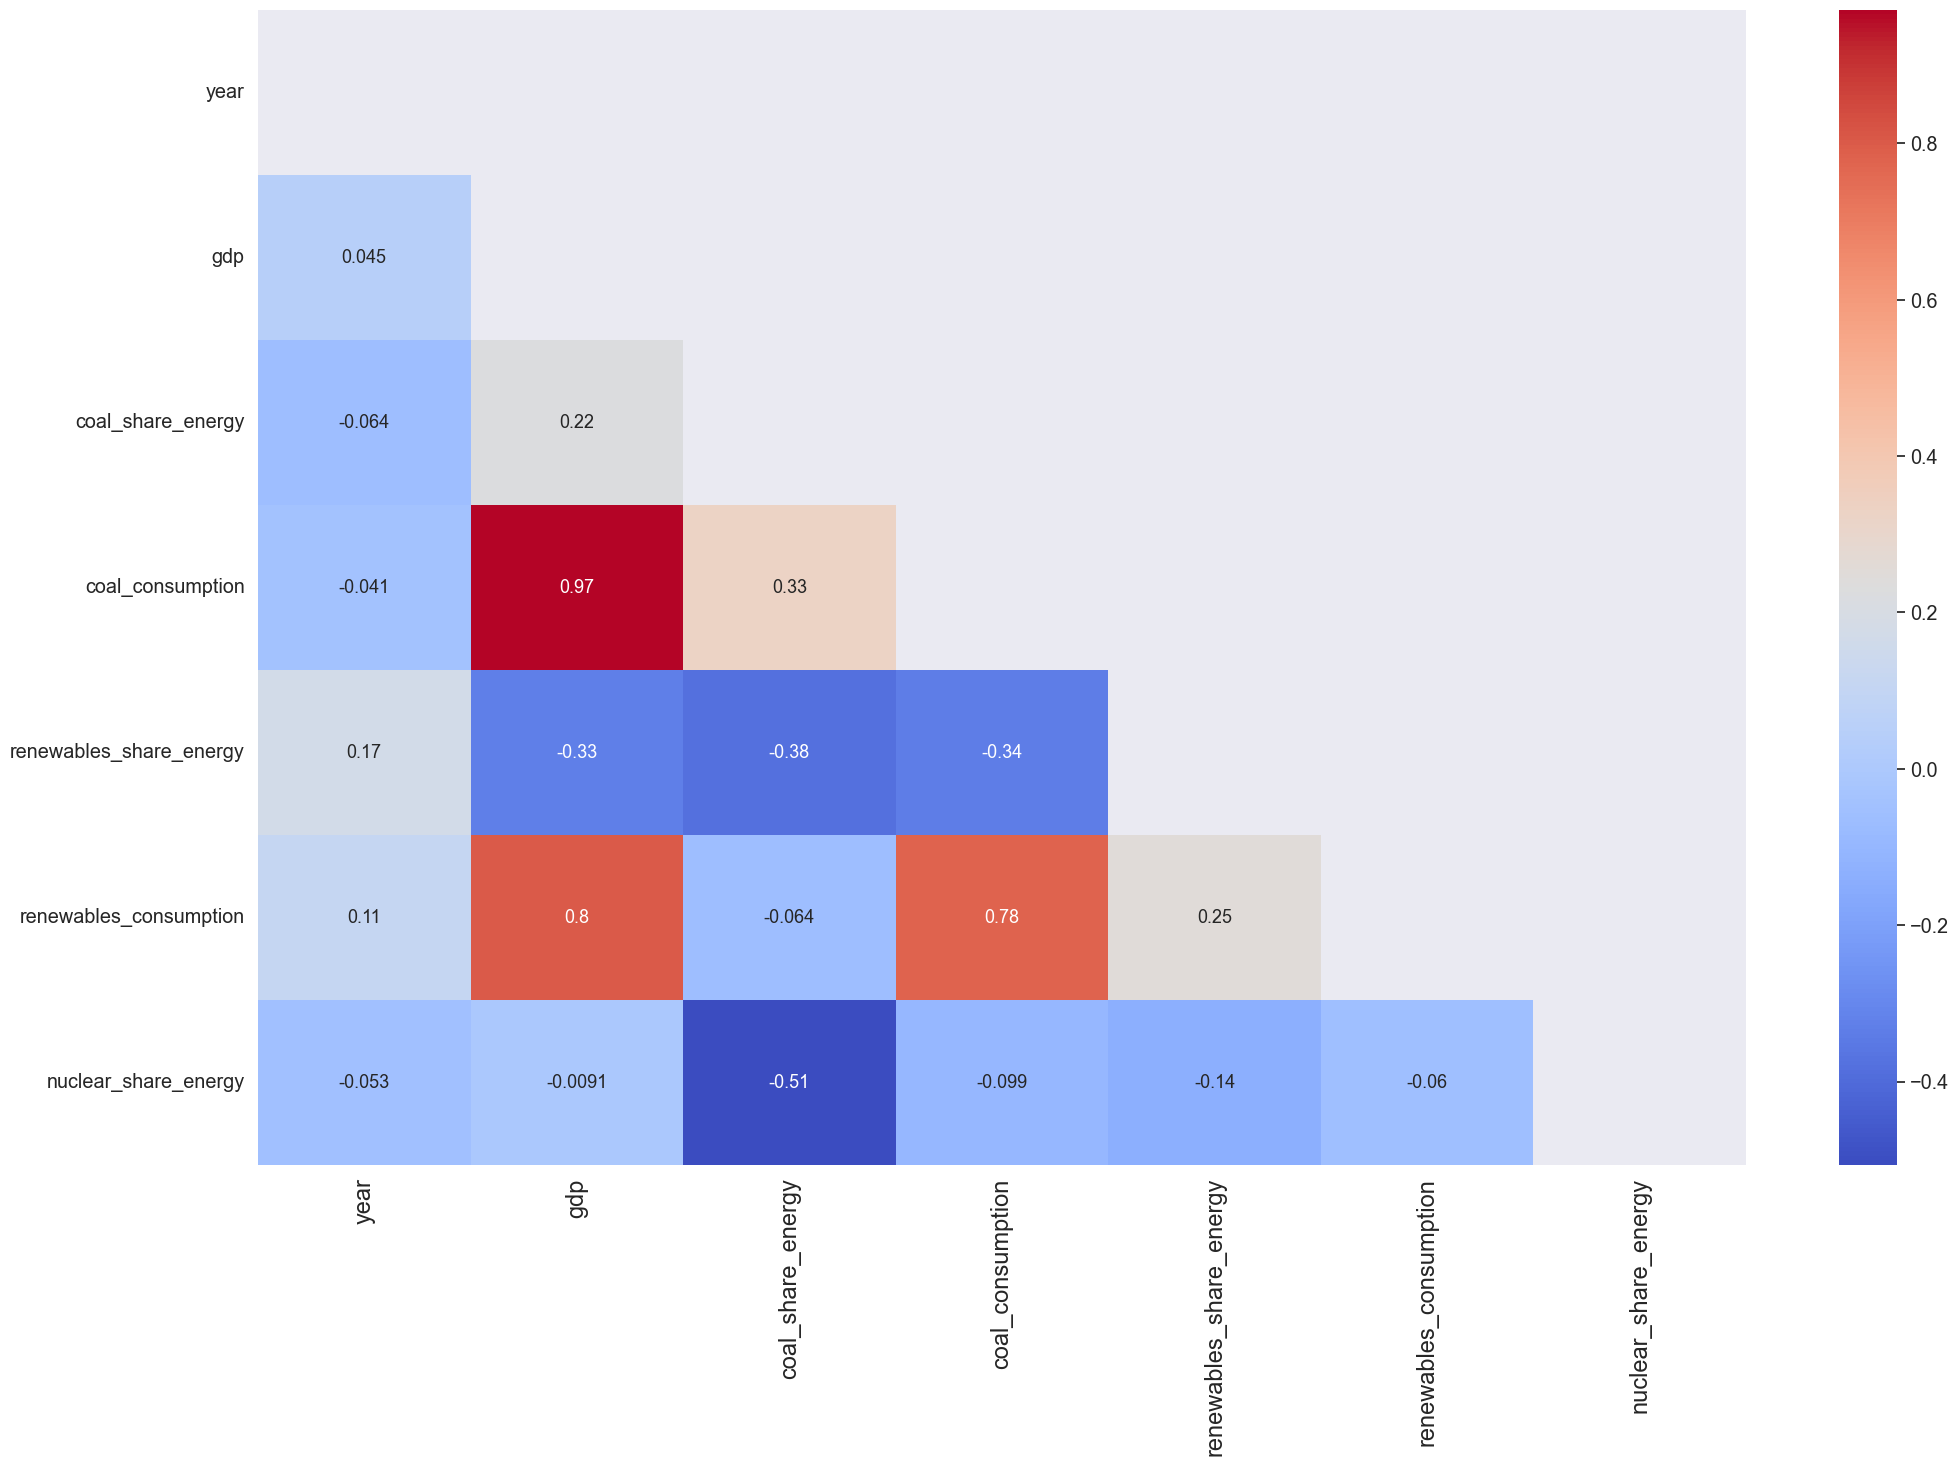

In [75]:
plt.figure(figsize=(24,15))
sns.heatmap(altereddataset.corr(),mask=mask, cmap="coolwarm",annot=True,annot_kws={'size':13})
plt.xticks(fontsize=17)
plt.xticks(fontsize=17)
plt.show()

In [76]:
dataset_pred=dataset[["population","coal_share_energy","coal_consumption","renewables_share_energy","renewables_consumption"]]
print(dataset_pred)

    population  coal_share_energy  coal_consumption  renewables_share_energy  \
0     71321000             30.254          0.046351                 0.203959   
1     72327000             29.241          0.047452                 0.328900   
2     73443000             29.488          0.052427                 0.315248   
3     74651000             29.924          0.057760                 0.337741   
4     75925000             26.082          0.047709                 0.367040   
..         ...                ...               ...                      ...   
67    64525000             19.069          0.062780                 0.066852   
68    64984000             18.186          0.058735                 0.119895   
69    65423000             15.532          0.044020                 0.186982   
70    65860000             11.911          0.030404                 0.259858   
71    66298000              5.790          0.005962                 0.261970   

    renewables_consumption  
0         

In [77]:
X = dataset_pred.iloc[:,[1]]
y = dataset_pred.iloc[:,[3]]

print(X)
print(y)


    coal_share_energy
0              30.254
1              29.241
2              29.488
3              29.924
4              26.082
..                ...
67             19.069
68             18.186
69             15.532
70             11.911
71              5.790

[72 rows x 1 columns]
    renewables_share_energy
0                  0.203959
1                  0.328900
2                  0.315248
3                  0.337741
4                  0.367040
..                      ...
67                 0.066852
68                 0.119895
69                 0.186982
70                 0.259858
71                 0.261970

[72 rows x 1 columns]


Her enerji türünün tüketimi düzenli şekilde artmıştır. Nüfus arttıkça birim cinsinden tüketim de artmıştır. Bazı ülkeler yenilenebilir enerjinin önemini daha erken anlamış, bazıları da enerji paylarında yenilenebilir enerjilere daha fazla yer vermiştir.

LEGEND / LEJANT

country	year-Geographic location -Coğrafi Lokasyon	

population- Nüfus	

gdp- Gayrisafi Yurtiçi Hasıla (Trillion USD )

coal_share_energy : Share of electricity consumption that comes from coal. Kömürden gelen elektrik tüketiminin payı.

coal_consumption : Primary energy consumption from coal, measured in terawatt-hours. Kömürden birincil enerji tüketimi, terawatt-saat cinsinden ölçülür.	

hydro_electricity : Electricity generation from hydropower, measured in terawatt-hours. Hidroelektrik enerjiden terawatt-saat cinsinden ölçülen elektrik üretimi.	

nuclear_electricity : Electricity generation from nuclear power, measured in terawatt-hours. Nükleer enerjiden terawatt-saat cinsinden ölçülen elektrik üretimi.	

renewables_electricity : Electricity generation from renewables, measured in terawatt-hours. Yenilenebilir enerjiden terawatt-saat cinsinden ölçülen elektrik üretimi.	

solar_electricity : Electricity generation from solar, measured in terawatt-hours. Güneş enerjisinden terawatt-saat cinsinden ölçülen elektrik üretimi.

wind_electricity : Electricity generation from wind, measured in terawatt-hours. Terawatt-saat cinsinden ölçülen rüzgardan elektrik üretimi.

hydro_share_elec : Share of electricity consumption that comes from hydropower. Hidroelektrik enerjiden gelen elektrik tüketiminin payı.

hydro_share_energy : Share of primary energy consumption that comes from hydropower. Hidroelektrik enerjiden gelen birincil enerji tüketiminin payı.
	
nuclear_share_energy : Share of electricity consumption that comes from nuclear power. Nükleer enerjiden gelen elektrik tüketiminin payı.
	
oil_share_energy : Share of electricity consumption that comes from oil. Petrolden gelen elektrik tüketiminin payı.	

renewables_share_elec : Share of electricity consumption that comes from renewables. Yenilenebilir kaynaklardan gelen elektrik tüketiminin payı.	

renewables_share_energy : Share of primary energy consumption that comes from renewables. Yenilenebilir kaynaklardan gelen birincil enerji tüketiminin payı.	

renewables_consumption : Primary energy consumption from renewables, measured in terawatt-hours. Yenilenebilir kaynaklardan elde edilen birincil enerji tüketimi, terawatt-saat cinsinden ölçülür.	

solar_share_elec : Share of electricity consumption that comes from solar. Güneşten gelen elektrik tüketiminin payı.	

solar_share_energy : Share of primary energy consumption that comes from solar. Güneşten gelen birincil enerji tüketiminin payı.

solar_consumption : Primary energy consumption from solar, measured in terawatt-hours. Terawatt-saat cinsinden ölçülen güneşten gelen birincil enerji tüketimi.

wind_share_elec : Share of electricity consumption that comes from wind. Rüzgardan gelen elektrik tüketiminin payı.

wind_share_energy : Share of primary energy consumption that comes from wind. Rüzgardan gelen birincil enerji tüketiminin payı.




This data has been collected, aggregated, and documented by Hannah Ritchie, Max Roser and Edouard Mathieu.(Hannah Ritchie and Max Roser (2020) - "Energy". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/energy' [Online Resource])

The mission of Our World in Data is to make data and research on the world’s largest problems understandable and accessible.




standardize names of countries and regions. Since the names of countries and regions are different in different data sources, standardize all names to the Our World in Data standard entity names.
recalculate primary energy in terawatt-hours. The primary data sources on energy—the BP Statistical Review of World Energy, 
for example—typically report consumption in terms of exajoules. recalculated these figures as terawatt-hours using a conversion factor of 277.8.
calculate per capita figures. All of our per capita figures are calculated from our metric Population, which is included in the complete dataset. 
These population figures are sourced from Gapminder and the UN World Population Prospects (UNWPP).



Data sources
Energy consumption (primary energy, energy mix and energy intensity): this data is sourced from a combination of two sources—the BP Statistical Review of World Energy and SHIFT Data Portal.
Electricity consumption (electricity consumption, and electricity mix): this data is sourced from a combination of two sources—the BP Statistical Review of World Energy and EMBER – Global Electricity Dashboard.
Other variables: this data is collected from a variety of sources (United Nations, World Bank, Gapminder, Maddison Project Database, etc.).

Yasin Top 20184029009
